In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [14]:
X = pd.read_csv('C:/Users/dz234/OneDrive/Desktop/Learning Process/Applied Data Science/countries_with_top_sellers_fashion_c2c.csv')

In [15]:
X.head()

,country,sellers,topsellers,topsellerratio,femalesellersratio,topfemalesellersratio,femalesellers,malesellers,topfemalesellers,topmalesellers,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,Taiwan,1,1,100.0,100.0,100.0,1,0,1,0,...,57.00,56.00,57.000000,56.000000,11.0,11.0,83.0,8.0,83.0,8.0
1,Slovaquie,2,1,50.0,0.0,0.0,0,2,0,1,...,27.00,14.00,14.000000,7.000000,17.0,15.0,10.5,8.5,15.0,8.0
2,Lettonie,4,2,50.0,100.0,100.0,4,0,2,0,...,40.50,18.00,20.750000,9.000000,120.3,11.5,21.0,52.3,38.0,98.5
3,Bulgarie,9,4,44.4,66.7,100.0,6,3,4,0,...,36.25,17.25,18.888889,9.111111,98.3,19.0,28.6,31.6,46.3,19.0
4,Chypre,4,1,25.0,100.0,100.0,4,0,1,0,...,41.00,66.00,14.000000,20.250000,17.3,11.0,21.3,10.3,39.0,17.0


In [16]:
# understand dataset 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

In [17]:
X1 = X.iloc[:,[2,15]]
print(X1)

    topsellers  totalproductslisted
0            1                   56
1            1                   14
2            2                   36
3            4                   82
4            1                   81
5            1                   26
6            2                   77
7            1                    8
8           13                  594
9           35                 2218
10           1                   69
11           1                   55
12           3                  231
13          21                  927
14           1                   37
15           5                  264
16           6                  816
17           2                  139
18          25                 1892


<AxesSubplot:>

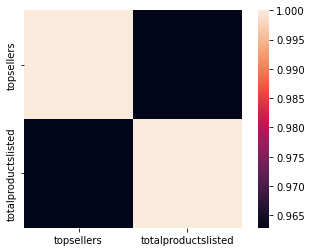

In [18]:
# checkk correlation 
cor = X1.corr()
sns.heatmap(cor, square = True)

In [19]:
X2 = X.iloc[:,[2,15]].values
print(X2)

[[   1   56]
 [   1   14]
 [   2   36]
 [   4   82]
 [   1   81]
 [   1   26]
 [   2   77]
 [   1    8]
 [  13  594]
 [  35 2218]
 [   1   69]
 [   1   55]
 [   3  231]
 [  21  927]
 [   1   37]
 [   5  264]
 [   6  816]
 [   2  139]
 [  25 1892]]


In [20]:
# scalling the dataset 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
XX = ss.fit_transform(X2)
XX

C:\Users\dz234\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


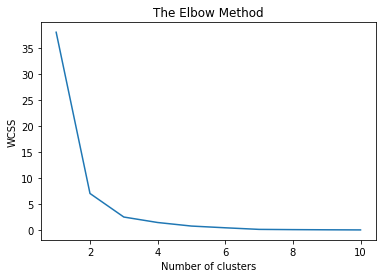

In [21]:
# find number of cluster, K 
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(XX) # using dataset after scalled 
    wcss.append(kmeans.inertia_) #inertia is the wcss value 
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(XX)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1])

C:\Users\dz234\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

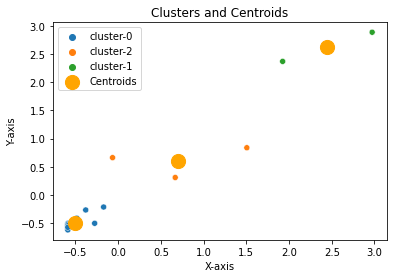

In [23]:
# visualizing K- Means Clustering 
sns.scatterplot(XX[:,0], XX[:,1], hue =['cluster-{}'.format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c ='orange', label = 'Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show

In [24]:
# check score 
score = silhouette_score(XX, kmeans.labels_, metric = 'euclidean')
print(score)

0.7429155534862315


In [ ]:
for i in range(1, 26):
    for j in range(1, 26):
        
        X1 = X.iloc[:,[i,j]]
        print(X1)
        X2 = X.iloc[:,[i,j]].values
        
        ss = StandardScaler()
        XX = ss.fit_transform(X2)
        
        wcss = []
        for i in range (1,11):
            kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
            kmeans.fit(XX) # using dataset after scalled 
            wcss.append(kmeans.inertia_) #inertia is the wcss value
        plt.plot(range(1,11),wcss)
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()
        
        score = silhouette_score(XX, kmeans.labels_, metric = 'euclidean')
        print(score)
        
    print()
